In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sc

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df.iloc[:,[3,4]].values
X.shape

(200, 2)

In [16]:
# Train test split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

# Standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

X_scaled = pd.DataFrame(X_scaled)
X_scaled.shape

(160, 2)

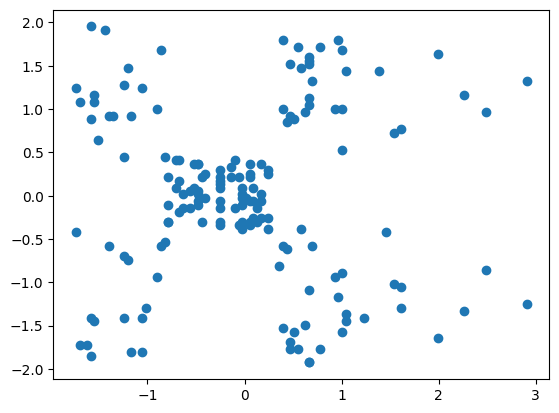

In [17]:
# No need for PCA as we have 2d dataa
plt.scatter(X_scaled[0], X_scaled[1])

<function matplotlib.pyplot.show(close=None, block=None)>

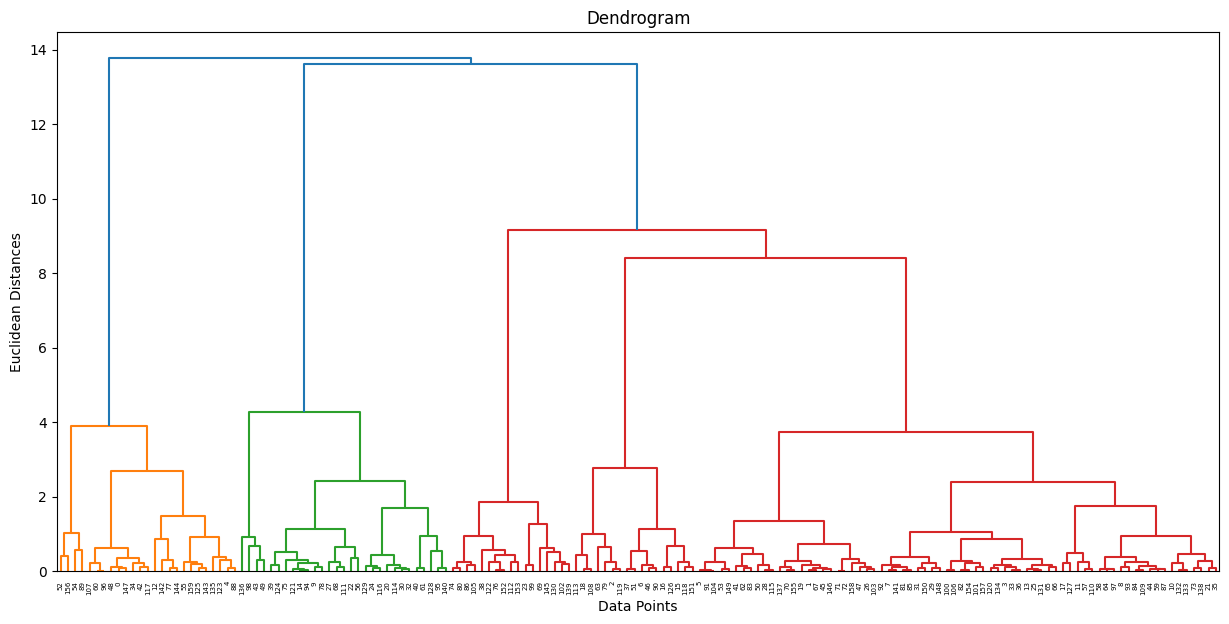

In [18]:
plt.figure(figsize = (15, 7))
plt.title('Dendrogram')

sc.dendrogram(sc.linkage(X_scaled, method = 'ward'))  # Fixed line for creating dendograms
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show

## Clusters  k = 5

In [19]:
cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X_scaled)
y_labels = cluster.labels_
y_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 2, 4, 2, 1, 2, 4, 2, 2, 0, 2, 2, 1, 2, 0, 4, 4, 2, 4, 2, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 4, 3, 0, 0, 2, 1, 0,
       2, 2, 4, 2, 1, 0, 2, 4, 1, 2, 1, 1, 0, 2, 2, 2, 1, 0, 2, 4, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 2, 3, 0, 3, 1, 0, 4, 3, 2, 2, 2, 2, 2, 3, 2,
       1, 1, 4, 2, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 2, 3, 2, 1, 4, 2,
       2, 0, 3, 4, 0, 2, 0, 1, 4, 4, 2, 0, 3, 1, 0, 1, 4, 2, 0, 0, 3, 2,
       2, 2, 2, 1, 0, 2, 2, 3, 0, 2, 1, 1, 1, 3, 2, 1, 2, 2, 2, 4, 3, 3,
       2, 2, 1, 2, 2, 1])

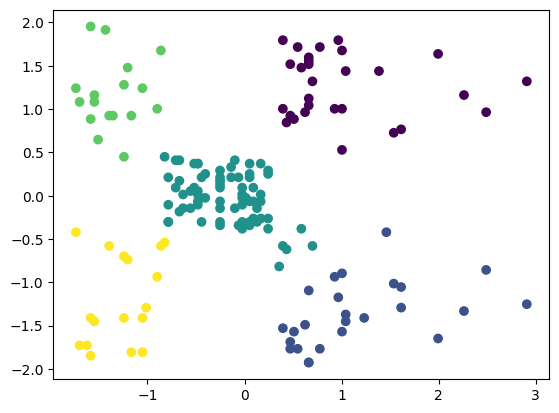

In [20]:
plt.scatter(X_scaled[0], X_scaled[1], c = y_labels)